# Animation of the near to far field

_M Kenworthy_ Leiden Observatory kenworthy@strw.leidenuniv.nl

Based on hcipy tutorials https://docs.hcipy.org/0.3.1/tutorials/index.html and examples, and http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/


In [1]:
#pip install progressbar2

In [2]:
#pip install ffpmeg

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *
from scenes import *

from progressbar import progressbar 

anim_version='v1'

In [4]:

# These modules are used for animating some of the graphs in our notebook.
from matplotlib import animation, rc
#from IPython.display import HTML


## HCIpy setup

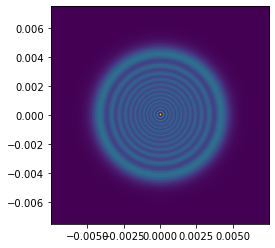

In [5]:
pupil_grid_2 = make_pupil_grid(1024, 0.015)
aperture_2 = circular_aperture(0.01)(pupil_grid_2)

fresnel_prop = FresnelPropagator(pupil_grid_2, 2)

wf = Wavefront(aperture_2, 500e-9)
img = fresnel_prop(wf)

imshow_field(img.intensity)
plt.show()

20.0


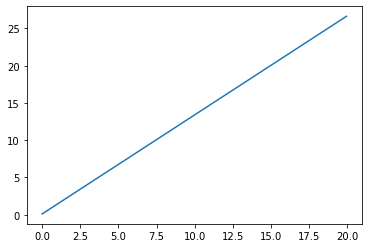

In [12]:

dist = Stage()
dist.add(Act(0.1, 26.7, 20))
print(dist.total_time())


t = np.arange(0,dist.total_time(),0.05)

plt.plot(t, dist.t(t))


In [13]:
total_time_animation = dist.total_time() # seconds
frame_rate = 20          # frames per second
total_frames = total_time_animation * frame_rate # seconds
supersampling = 4

plt.figure(figsize=(8,4))

anim = FFMpegWriter('video.mp4', framerate=frame_rate)

times = np.arange(0,total_time_animation, 1./frame_rate)

di = dist.t(times)

for t in progressbar(range(np.int(total_frames))):
    
    
    fresnel_prop = FresnelPropagator(pupil_grid_2, di[t])

    wf = Wavefront(aperture_2, 500e-9)
    img = fresnel_prop(wf)

    
    plt.clf()
    plt.suptitle('Distance from aperture {:.1f} millimeters'.format(di[t]*1000.))

    plt.subplot(1,2,1)

    imshow_field(img.intensity)
    
    plt.title('Aperture')
    
    plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=plt.gca().transAxes)
    
    plt.subplot(1,2,2)
    imshow_field(img.intensity)
    plt.xlim(-0.001, 0.001)
    plt.ylim(-0.001, 0.001)

    plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)
    
    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim
    


100% (400 of 400) |######################| Elapsed Time: 0:13:50 Time:  0:13:50


In [14]:
!ffmpeg -i video.mp4 -vf "fps=20,scale=600:-1:flags=lanczos" -c:v pam -f image2pipe - | convert -delay 10 - -loop 0 -layers optimize output.gif

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 11.0.3 (clang-1103.0.32.62)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1_1 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --disable-libjack --disable-indev=jack
  libavutil      56. 51.100 /